# Final Work
Machine Learning 2020 



The data bankData.csv corresponds to a targeted marketing campaign (by telephone) of a Portuguese bank. The classification objective is to be able to predict whether or not the customer will take a term deposit (variable "y" located in the last column of the table) based on a set of 18 attributes described in the file Attributes.pdf. Upload the dataset (bankData.csv) to Google Drive in the Data folder and then upload to this notebook and answer the questions.


<font color='#3f68bf' size='5'><b>Aprendizaje Automático - Universidad Adolfo Ibañez</b></font>

Profesor: **Gonzalo Ruz**

Alumnos:

  1. **Angélica Leiva**
  2. **Jorge Navarro**
  3. **Erick Villarroel**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Data/bankData.csv')

## Question 1
Omit the variable "y", then determine an appropriate number of clusters using k-means for this dataset. For k-means with k equal to the value found, provide the profile of the typical customer for each cluster.  

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

Data is reviewed:




In [11]:
data.describe(include="all")

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119,4119,4119,4119,4119,4119,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119
unique,NaN,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,1264,3315,2175,3349,2652,1378,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [12]:
data.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


its reviewed the shape of the table:

In [13]:
data.shape

(4119, 19)

In [14]:
# Eliminar última columna
dt=data.iloc[:, 0:18] 
dt.head()

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8


Only continuous attributes are used:

In [15]:
X=dt[['age','duration','pdays', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
X.head(5)

,age,duration,pdays,previous,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,999,0,2,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,999,0,4,1.1,93.994,-36.4,4.855,5191.0
2,25,227,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,17,999,0,3,1.4,94.465,-41.8,4.959,5228.1
4,47,58,999,0,1,-0.1,93.200,-42.0,4.191,5195.8


In [16]:
# Se estandarizan los datos para que tengan media 0 y varianza 1
X_std = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)
X_std.head(5)

,age,duration,pdays,previous,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.980752,0.903952,0.201031,-0.351356,-0.209228,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779
1,-0.107991,0.350300,0.201031,-0.351356,0.569634,0.649441,0.715193,0.892269,0.711698,0.332862
2,-1.465619,-0.116966,0.201031,-0.351356,-0.598660,0.841389,1.528273,-0.283172,0.773427,0.836535
3,-0.204965,-0.941553,0.201031,-0.351356,0.180203,0.841389,1.528273,-0.283172,0.771697,0.836535
4,0.667795,-0.780563,0.201031,-0.351356,-0.598660,-0.118350,-0.655478,-0.326707,0.328632,0.398028


The optimal value of K is reviewed:

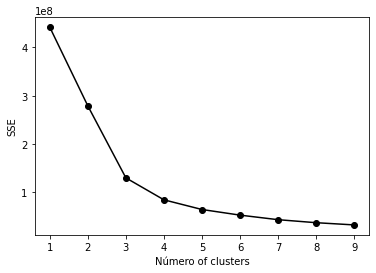

In [17]:
SSE = []
for i in range(1, 10):
  km = KMeans(n_clusters=i)
  km.fit(X)
  SSE.append(km.inertia_)

# plot the nª of k vs error
plt.plot(range(1, 10), SSE,'-o', color='black')
plt.xlabel('Número of clusters')
plt.ylabel('SSE')
plt.show()

K=3 its the appropiate

In [19]:
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X_std)
identified_clusters2 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters2,'\n')

kmeans = KMeans(n_clusters=3)
kfit = kmeans.fit(X_std)
identified_clusters3 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters3,'\n')

kmeans = KMeans(n_clusters=4)
kfit = kmeans.fit(X_std)
identified_clusters4 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters4,'\n')

kmeans = KMeans(n_clusters=5)
kfit = kmeans.fit(X_std)
identified_clusters5 = kfit.predict(X_std)
print(kfit.cluster_centers_,'\n')
print(identified_clusters5,'\n')

[[ 0.00795964  0.04678138 -0.41279229  0.61746691 -0.20518675 -1.34521293
  -0.90423586 -0.45687588 -1.41129732 -1.30923241]
 [-0.00387637 -0.0227827   0.20103134 -0.30070861  0.09992669  0.65512356
   0.44036613  0.2225002   0.68730689  0.63760091]] 

[0 1 1 ... 0 1 1] 

[[-3.87637477e-03 -2.27827016e-02  2.01031335e-01 -3.00708613e-01
   9.99266864e-02  6.55123555e-01  4.40366130e-01  2.22500201e-01
   6.87306890e-01  6.37600909e-01]
 [-2.11655200e-02  1.98853784e-02  2.01031335e-01  2.85773996e-01
  -1.94111125e-01 -1.34600615e+00 -9.92001690e-01 -5.83948389e-01
  -1.39856906e+00 -1.22581937e+00]
 [ 2.18406703e-01  2.41121403e-01 -4.84804226e+00  3.01415044e+00
  -2.85214868e-01 -1.33948146e+00 -2.70074250e-01  4.61300515e-01
  -1.50326677e+00 -1.91194246e+00]] 

[1 0 0 ... 1 0 0] 

[[ 2.18406703e-01  2.41121403e-01 -4.84804226e+00  3.01415044e+00
  -2.85214868e-01 -1.33948146e+00 -2.70074250e-01  4.61300515e-01
  -1.50326677e+00 -1.91194246e+00]
 [-5.19818199e-03  1.81157960e-03  2

Displayed using PCA:

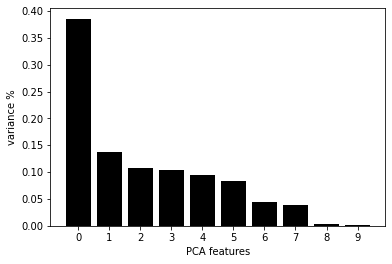

In [20]:
# Create an instance PCA: pca
pca = PCA()
principalComponents = pca.fit_transform(X_std)


features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)


PCA_components = pd.DataFrame(principalComponents)

The 2 main components are used to project the 2D data

<Figure size 864x864 with 0 Axes>

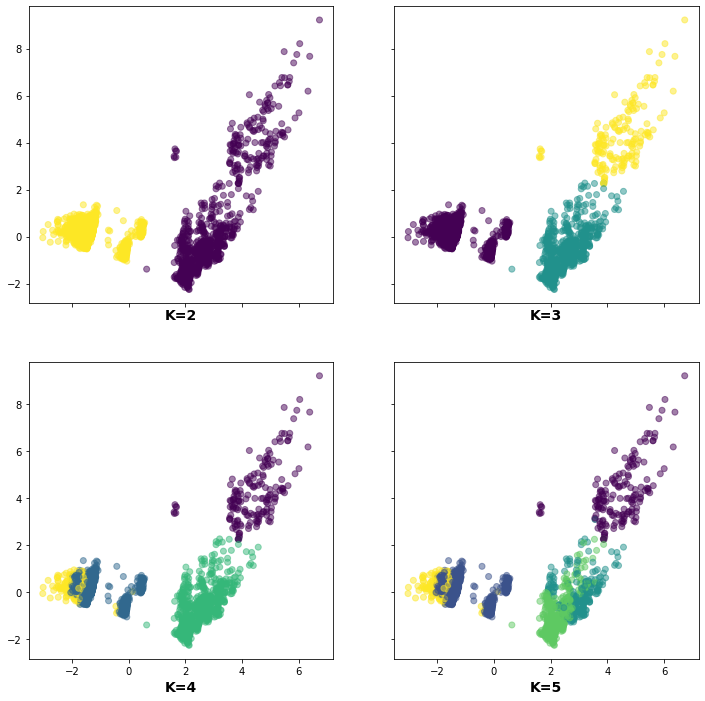

In [22]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

sc = axes[0][0].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters2)
axes[0][0].set_xlabel('K=2', labelpad = 5)

#legend1 = axes[0][0].legend(*scatter.legend_elements(),
#                    loc="upper right", title="Clusters")
#axes[0][0].add_artist(legend1)

axes[0][1].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters3)
axes[0][1].set_xlabel('K=3', labelpad = 5)

axes[1][0].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters4)
axes[1][0].set_xlabel('K=4')

axes[1][1].scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=identified_clusters5)
axes[1][1].set_xlabel('K=5')

plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.labelsize"] = 14

plt.show()
plt.rcParams['figure.figsize'] = (12,12)

K-means is used with k=3

Labels are added to the original dataset to characterize each cluster.

In [24]:
data_clusterizada= data.copy()
data_clusterizada['Cluster'] = identified_clusters3
data_clusterizada.head(5)

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Cluster
0,30,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


**Customer Profile Analysis for each type of Cluster**.

In [29]:
# Generate range of age
cortes = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
data_clusterizada['rango_edad'] = pd.cut(data_clusterizada.age, cortes, labels = labels,include_lowest = True)

In [36]:
# Frec Table

print('Cluster / Rango de Edad')
print(data_clusterizada.groupby(['Cluster','rango_edad']).size(),'\n')
print(pd.crosstab(data_clusterizada['Cluster'],data_clusterizada['rango_edad']).apply(lambda r: round((r/r.sum())*100,1), axis=1).to_string(),'\n')
print('=' * 150 + '\n')

for col in data_clusterizada.columns: 
    print('Cluster / ' + col)
    print(data_clusterizada.groupby(['Cluster',col]).size(),'\n')
    print(pd.crosstab(data_clusterizada['Cluster'],data_clusterizada[col]).apply(lambda r: round((r/r.sum())*100,1), axis=1).to_string(),'\n')
    print('=' * 150 + '\n')


Cluster / Rango de Edad
Cluster  rango_edad
0        18-29          433
         30-39         1119
         40-49          739
         50-59          479
         60-69            0
         70+              0
1        18-29          260
         30-39          440
         40-49          262
         50-59          160
         60-69           35
         70+             28
2        18-29           35
         30-39           55
         40-49           29
         50-59           29
         60-69            7
         70+              9
dtype: int64 

rango_edad  18-29  30-39  40-49  50-59  60-69  70+
Cluster                                           
0            15.6   40.4   26.7   17.3    0.0  0.0
1            21.9   37.1   22.1   13.5    3.0  2.4
2            21.3   33.5   17.7   17.7    4.3  5.5 


Cluster / age
Cluster  age
0        21      1
         22      7
         23      8
         24     30
         25     34
                ..
2        77      1
         78      1


<font color='#3f68bf' size='4'><b>Typical customer profile for each cluster.</b></font>

<font color='#3f68bf' size='4'><b>Cluster 0:</b></font>

  * Between 18 and 39 years of age
  * Formal education beyond high school
  * 98% have credit in arrears
  * 58% have a mortgage loan
  * No personal loans (82%)
  * 81% have been contacted less than 10 days ago
  * They have been contacted between 1 and 4 times.
  * 86% had a successful outcome of the previous marketing campaign


<font color='#3f68bf' size='4'><b>Cluster 1:</b></font>

  * Between 30 and 49 years of age
  * Formal education beyond high school
  * 76% have credit in arrears
  * 50% have a mortgage loan
  * No personal credit (81%)
  * Have not been contacted before

<font color='#3f68bf' size='4'><b>Cluster 2:</b></font>

  * Between 30 and 49 years of age
  * Formal education beyond high school
  * 88% have credit in arrears
  * 56% have a mortgage credit
  * No personal credit (81%)
  * Have not been contacted before


## Question 2
Omit the variable "y" again, run k-means with k=2. Compare the (resulting) vector of cluster labels and the "y" variable. Point out the % of correspondence (or hits) between the class and the label with the clusters. (Hint, use the confusion matrix to measure the % of hits).

### **Answer:**

run k-means with k=2:

In [37]:
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X_std)
identified_clusters = kfit.predict(X_std)
print(identified_clusters)

[0 1 1 ... 0 1 1]


In [100]:
# Clustering data
data_clusterizada2= data.copy()
data_clusterizada2['Cluster'] = identified_clusters

# transform to numeric column y
data_clusterizada2["y"]=np.where(data_clusterizada2["y"]=="no",0,1)


data_clusterizada2.head(5)


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Cluster
0,30,2,1,0,1,0,4,4,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,1,0
1,39,3,1,1,1,1,4,4,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,1,1
2,25,3,1,0,1,1,5,2,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,1,1
3,38,2,1,2,2,1,5,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,1,1
4,47,7,1,0,1,0,10,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,1,1


In [101]:
#matriz de confusión

print(confusion_matrix(data_clusterizada2["y"], data_clusterizada2["Cluster"]),'\n')

#Accuracy
# (VP+VN)/(VP+VN+FP+FN)
# Donde:
# VP = Verdaderos Positivos
# VN = Verdaderos Negativos
# FP = Falsos Positivos
# FN = Falsos Positivos

data_clusterizada["y_2"]=np.where(data_clusterizada["y"]=="no","Negativo","Positivo")
data_clusterizada["Cluster_2"]=np.where(data_clusterizada["Cluster"]==0,"Negativo","Positivo")
#data_clusterizada.head(20)

print(pd.crosstab(data_clusterizada['y_2'],data_clusterizada['Cluster_2']),'\n')
print(pd.crosstab(data_clusterizada['y_2'],data_clusterizada['Cluster_2']).apply(lambda r: round((r/r.sum())*100,1), axis=1),'\n')

df_vp = data_clusterizada[data_clusterizada['y_2'].str.contains('Positivo') & data_clusterizada['Cluster_2'].str.contains('Positivo')]
df_vn = data_clusterizada[data_clusterizada['y_2'].str.contains('Negativo') & data_clusterizada['Cluster_2'].str.contains('Negativo')]
df_fp = data_clusterizada[data_clusterizada['y_2'].str.contains('Negativo') & data_clusterizada['Cluster_2'].str.contains('Positivo')]
df_fn = data_clusterizada[data_clusterizada['y_2'].str.contains('Positivo') & data_clusterizada['Cluster_2'].str.contains('Negativo')]
vp = len(df_vp.index)
vn = len(df_vn.index)
fp = len(df_fp.index)
fn = len(df_fn.index)

print('Total = ',len(data_clusterizada.index))
print('Verdaderos Positivos = ',vp)
print('Verdaderos Negativos = ',vn)
print('Falsos Positivos = ',fp)
print('Falsos Negativos = ',fn,'\n')

score = round((vp+vn)/(vp+vn+fp+fn),4)

print ('Score = ',score)

[[   0    0]
 [1349 2770]] 

Cluster_2  Negativo  Positivo
y_2                          
Negativo       2637      1031
Positivo        133       318 

Cluster_2  Negativo  Positivo
y_2                          
Negativo       71.9      28.1
Positivo       29.5      70.5 

Total =  4119
Verdaderos Positivos =  318
Verdaderos Negativos =  2637
Falsos Positivos =  1031
Falsos Negativos =  133 

Score =  0.7174


</br><font color='#3f68bf' size='4'>
The percentage of hits among the class  <b>"y"</b> with the label <b>clusters</b> its of <b>71,74%</b> (2.955 hits on 4.119)
</font>



## Question 3
Using `X_train2` (for training) and `X_val` (for evaluation), explore a suitable depth for a decision tree such that it does not overfit. Then, train a decision tree (with the previously determined depth) using the training set `X_train` and deliver the percentage of correct classifications when evaluating the model with the test set `X_test`. Plot the resulting tree. Point out which is harder for the classifier to predict: a customer who will take a term deposit or a customer who will not take a term deposit. Justify your answer.


In [76]:
data["housing"]=np.where(data["housing"]=="yes",0,
                         np.where(data["housing"]=="no",1,2))

data["default"]=np.where(data["default"]=="yes",0,
                         np.where(data["default"]=="no",1,2))

data["loan"]=np.where(data["loan"]=="yes",0,
                         np.where(data["loan"]=="no",1,2))

data["y"]=np.where(data["y"]=="yes",0,1)

data["poutcome"]=np.where(data["poutcome"]=="failure",0,
                         np.where(data["poutcome"]=="nonexistent",1,2)) 

data["contact"]=np.where(data["contact"]=="cellular",0,1)

data["day_of_week"]=np.where(data["day_of_week"]=="mon",0,
                              np.where(data["day_of_week"]=="tue",1,
                                       np.where(data["day_of_week"]=="wed",2,
                                                np.where(data["day_of_week"]=="thu",3,4))))

data["education"]=np.where(data["education"]=="basic.4y",0,
                              np.where(data["education"]=="basic.6y",1,
                                       np.where(data["education"]=="basic.9y",2,
                                                np.where(data["education"]=="high.school",3,
                                                         np.where(data["education"]=="high.school",4,
                                                                  np.where(data["education"]=="illiterate",5,
                                                                           np.where(data["education"]=="professional.course",6,
                                                                                    np.where(data["education"]=="university.degree",7,8))))))))

data["month"]=np.where(data["month"]=="jan",0,
                              np.where(data["month"]=="feb",1,
                                       np.where(data["month"]=="mar",2,
                                                np.where(data["month"]=="apr",3,
                                                         np.where(data["month"]=="may",4,
                                                                  np.where(data["month"]=="jun",5,
                                                                           np.where(data["month"]=="jul",6,
                                                                                    np.where(data["month"]=="aug",7,
                                                                                             np.where(data["month"]=="sep",8,
                                                                                                      np.where(data["month"]=="oct",9,
                                                                                                               np.where(data["month"]=="nov",10,11)))))))))))
                                               

In [90]:
data.head(7)

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,1,0,1,0,4,4,487,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,1
1,39,3,1,1,1,1,4,4,346,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,1
2,25,3,1,0,1,1,5,2,227,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,1
3,38,2,1,2,2,1,5,4,17,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,1
4,47,7,1,0,1,0,10,0,58,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,1
5,32,7,1,1,1,0,8,3,128,3,999,2,0,-1.1,94.199,-37.5,0.884,4963.6,1
6,32,7,1,0,1,0,8,0,290,4,999,0,1,-1.1,94.199,-37.5,0.879,4963.6,1


In [91]:
#first partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,0:18],data['y'],
    test_size=0.3, random_state=0)

#second partition
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

Define tree depth

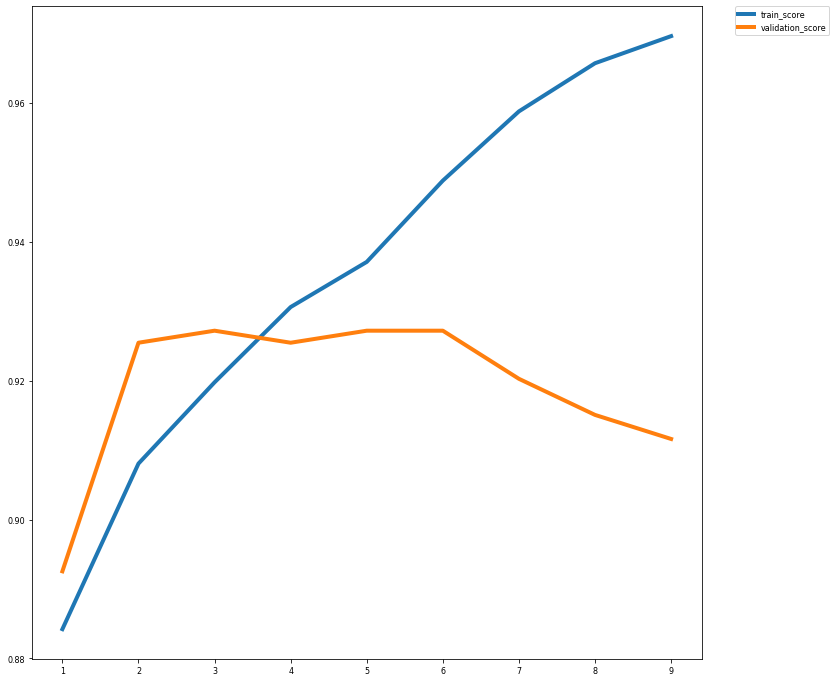

In [92]:

train_score, val_score = [],[]
for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train2, y_train2)
    train_score.append(tree.score(X_train2, y_train2))
    val_score.append(tree.score(X_val, y_val))
plt.plot(range(1,10), train_score, label="train_score", linewidth=4)
plt.plot(range(1,10), val_score, label="validation_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


its will be used a depth of 3

In [93]:
#entrenar el modelo 
model1 = DecisionTreeClassifier(random_state=0,max_depth=3)
model1.fit(X_train, y_train)

#realizar la predicción
predicted = model1.predict(X_test)

#matriz de confusión
print(confusion_matrix(y_test, predicted))

#Accuracy
print("Score: {:.2f}".format(model1.score(X_test, y_test) ))

[[  65   57]
 [  71 1043]]
Score: 0.90


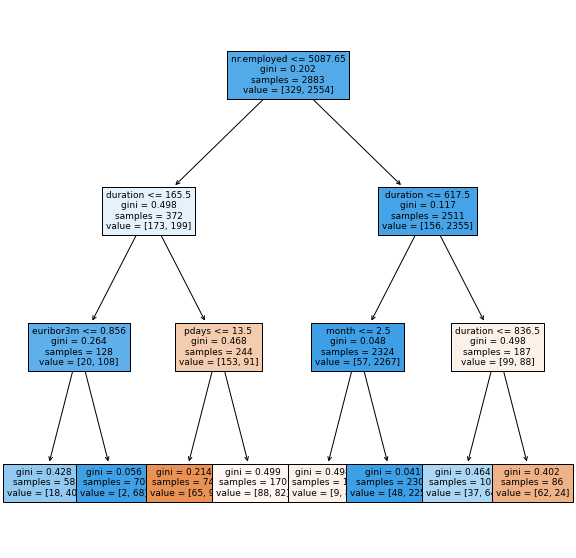

In [94]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
plot_tree(model1, feature_names=X_train.columns, fontsize=9,filled=True)
plt.show()

<br><font color='#3f68bf' size='4'>
The model has a harder time predicting which clients will take a time deposit, since approximately 89% of the data corresponds to records of people who did not take a deposit, which is also reflected in the confusion matrix where 84% of the predictions correspond to true negatives.
</font>

## Question 4
Based on the resulting tree. What is the most important attribute for this classification problem. Which attributes do not contribute (are irrelevant) to this classification problem.

### Answer

The relevance of each attribute in the model is reviewed:

In [95]:
model1.feature_importances_
# Importancia de los atributos, suma hasta 1
print("Importancia de los atributos:\n{}".format(model1.feature_importances_))

Importancia de los atributos:
[0.         0.         0.         0.         0.         0.
 0.03239333 0.         0.50880585 0.         0.0497842  0.
 0.         0.         0.         0.         0.01868741 0.39032921]


They are reviewed graphically to know what is the contribution of the attributes in the solution of the problem:

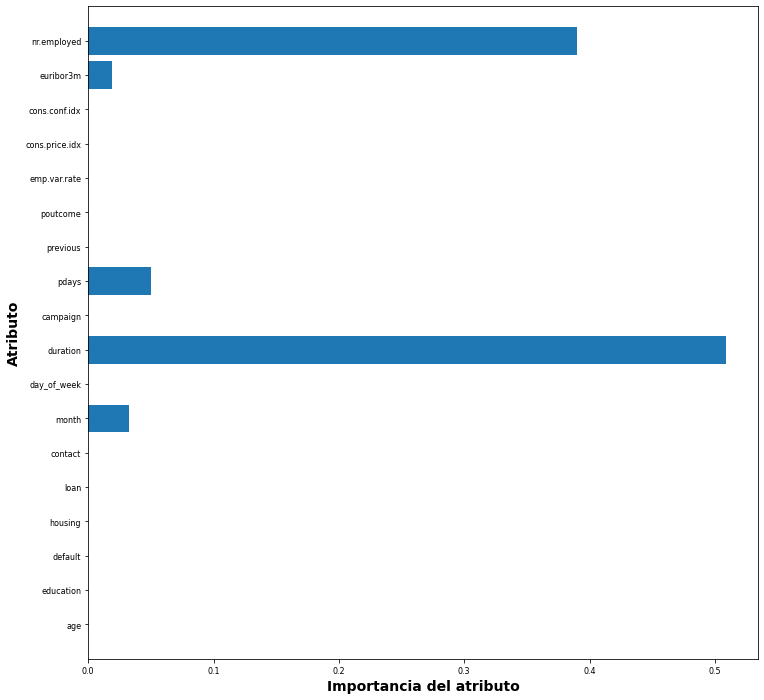

In [96]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Importancia del atributo")
    plt.ylabel("Atributo")
    plt.ylim(-1, n_features)

plt.rcParams.update({'font.size': 8})
plot_feature_importances(model1)

<font color='#3f68bf' size='4'>
The most important attribute for this classification problem is <b>"Duration"</b>.</br>
Attributes that do not contribute to the resolution of this problem are:

1.   cons.conf.idx
2.   cons.price.idx
3.   Elemento de lista
4.   emp.var.rate
5.   poutcome
6.   previous
7.   campaign
8.   day_of_week
9.   contact
10.   loan
11.   housing
12.   default
13.   education
14.   age

</font>














## Question 5 
Train a naive Bayes using the `X_train` training set and deliver the percentage of correct classifications when evaluating the model with the `X_test` test set.

### Respuesta

The model is trained using naive Bayes:


In [97]:
#Utilizando todas las variables

#entrenar el modelo
model2 = GaussianNB()
model2.fit(X_train, y_train)

#realizar la predicción
predicted = model2.predict(X_test)

#matriz de confusión
print(confusion_matrix(y_test, predicted))

#Accuracy
print("Score: {:.2f}".format(model2.score(X_test, y_test) ))

[[ 63  59]
 [137 977]]
Score: 0.84


<br><font color='#3f68bf' size='4'>The percentage of <b>correct classification</b> of the model is <b>84%</b>.</font>


## Question 6
Train a naive Bayes using the training set `X_train`, but only using the attributes that appear in the tree obtained in question 3. Give the percentage of correct classifications when evaluating the model with the test set `X_test`. Does the performance improve when compared to that obtained in question 5?

### Answer

Only the attributes used in the decision tree are selected:

In [98]:

Xtrain=X_train[['nr.employed','duration','euribor3m','pdays', 'month']]
Xtest=X_test[['nr.employed','duration','euribor3m','pdays', 'month']]

The model is trained and the percentage of correct classifications is obtained:

In [99]:
#Train model
model3 = GaussianNB()
model3.fit(Xtrain, y_train)


predicted = model3.predict(Xtest)


print(confusion_matrix(y_test, predicted))


print("Score: {:.2f}".format(model3.score(Xtest, y_test) ))

[[  53   69]
 [  62 1052]]
Score: 0.89


<br><font color='#3f68bf' size='4'>AWhen using only the attributes that appear in the tree of question 3, an improvement in the model performance is verified. Using all the attributes of the dataset the percentage of correct classifications is of <b>84%</b>, which increases to <b>89%</b> using only the attributes defined in the decision tree.</font>
